## Regularization : Penalized regression

REgularization force the learning algortihm to build a less complex model. In practice, that often leads to slightly higher bias but significantly reduces variance. The most commonly penalized regression models are:

* Ridge regression
* Lasso regression
* Elastic-net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to our synthetic data generated from the following true model f(x)

    y = f(x) = x + 2* x**2 - 3*x**3 + ε
    
The target variable is y and the features are 5 polynomial features of X. Namely, X1, X, X2= X**2, X3 = X**3 and etc.

First we need to import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set() # if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings("ignore")


In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("Regularization_synthetic.csv")

In [4]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


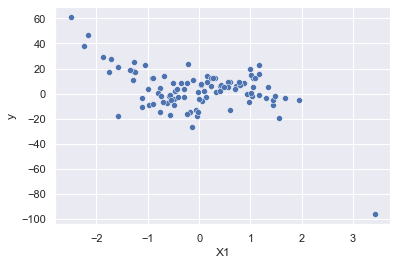

In [6]:
sns.scatterplot(x= "X1", y= "y", data = df);

**important :**we need to mormalize the features before training the models. Why? 

In [7]:
# to normalize the features import libraries we need

from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler() # creates an empty scaler object to use in scaling the features

# Standardize features by removing the mean and scaling to unit variance.
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples
#.. in the training set. Mean and standard deviation are then stored to be used on later data using :meth:`transform`.

In [10]:
df_sc = scaler.fit_transform(df) # to standardize all df
df_sc

array([[ 1.68559489e+00,  1.10379599e+00,  9.39692609e-01,
         2.85294690e-01,  2.08937746e-01, -4.11600924e-01],
       [ 9.55516566e-01, -1.12695401e-01,  1.55823259e-01,
        -1.94689457e-01, -4.00857984e-02, -2.06708827e-01],
       [ 1.08549235e+00,  5.29405005e-02,  2.35400708e-01,
        -1.59197995e-01, -2.69509817e-02,  5.43551414e-01],
       [-8.60516108e-01, -1.19138049e-01, -1.64682881e-01,
        -1.95879744e-01, -6.73748876e-02,  5.28620598e-01],
       [ 1.32329366e+00,  4.13097970e-01,  4.41459769e-01,
        -4.95365675e-02,  2.15699452e-02, -4.04102491e-01],
       [ 3.70555211e-01, -5.85040325e-01,  1.53240554e-03,
        -2.44199973e-01, -5.38533136e-02, -1.24339112e-01],
       [-4.56729809e-01, -4.90096100e-01, -3.28678475e-02,
        -2.40395588e-01, -5.46356518e-02,  2.99380637e-01],
       [-8.43557728e-01, -1.39001590e-01, -1.55924100e-01,
        -1.99459909e-01, -6.61623179e-02,  5.57668419e-01],
       [-8.31078676e-02, -6.43663686e-01, -6.315

In [11]:
df_sc[0]

array([ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
       -0.41160092])

In [12]:
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,-0.045528,1.035573,0.028803,3.577067e+00,2.649662e+00,3.163589
std,1.021734,1.590583,4.933266,1.467239e+01,4.937498e+01,17.251525
min,-2.502813,0.000077,-15.677801,5.990000e-09,-9.820688e+01,-96.615135
25%,-0.715772,0.106957,-0.367584,1.146202e-02,-1.894007e-01,-4.740569
50%,-0.056092,0.513483,-0.000186,2.639740e-01,-6.630000e-07,3.535766
75%,0.708103,1.265628,0.355353,1.605267e+00,1.785395e-01,12.250487
max,3.428563,11.755044,40.302907,1.381811e+02,4.737624e+02,61.375324


In [13]:
# checking the first observation for y1

(-3.901562 - 3.163589)/ 17.251525  # (yi -y.mean())/y.std()

-0.4095377655018904

In [14]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'y'], dtype='object')

In [16]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


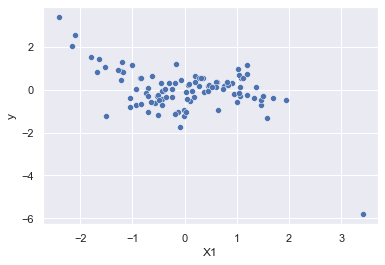

In [18]:
sns.scatterplot(x="X1", y= "y", data = df_sc);

# Standardization doesn't change the pattern. The only sclaes was changed.

## Splitting the data

In [22]:
y = df_sc["y"]
X = df_sc.drop("y", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


As we can see from the table above, the variables are highly correlated with each other.

Let's first run a linear regression (using statsmodels.api) and see the results as a benchmark.

In [23]:
X_test_wc = sm.add_constant(X_test)  # wc(with constant)
X_train_wc = sm.add_constant(X_train)  # wc(with constant)

In [24]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.28e-08
Time:                        12:33:38   Log-Likelihood:                -65.981
No. Observations:                  80   AIC:                             144.0
Df Residuals:                      74   BIC:                             158.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.173      0.504      0.616      -0.257       0.431
X1             0.5370      0.199      2.705      0.008       0.141       0.933
X2             0.1037      0.302      0.343      0.732      -0.498       0.705
X3            -2.1339      0.839     -2.543      0.013      -3.806      -0.462
X4             0.2535      0.861      0.294      0.769      -1.463       1.970
X5             1.5933      1.669      0.954      0.343      -1.733       4.920
==============================================================================
Omnibus:                       11.757   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.171
Skew:                          -0.701   Prob(JB):                     0.000837
Kurtosis:                       4.512   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Training the models

In this section we will train 4 different models :

1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [26]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0)
model_lasso = Lasso(alpha=0)
model_net = ElasticNet(alpha=0)

In [27]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [28]:
df_predictions = pd.DataFrame({"y_test" : y_test,
                              "y_hat_linear" : y_hat_linear,
                              "y_hat_ridge" : y_hat_ridge,
                              "y_hat_lasso" : y_hat_lasso,
                              "y_hat_net" : y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.171067,0.171067,0.171067
4,-0.404102,-0.079686,-0.079686,-0.079686,-0.079686
62,-1.055680,-0.180921,-0.180921,-0.180921,-0.180921
63,2.538916,2.344482,2.344482,2.344482,2.344482
48,1.144605,-0.078630,-0.078630,-0.078630,-0.078630


## coefficients

In [29]:
df.drop("y", axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [30]:
coefficients = pd.DataFrame({"Features": df.drop("y", axis=1, inplace=False).columns})
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.537047,0.537047,0.537047
1,X2,0.103655,0.103655,0.103655,0.103655
2,X3,-2.133872,-2.133872,-2.133872,-2.133872
3,X4,0.253492,0.253492,0.253492,0.253492
4,X5,1.593336,1.593336,1.593336,1.593336


## performence in the test set

In [31]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [32]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [33]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [34]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

## plotting the regression coefficients vs alphas

### ridge regression coefficients vs alpha

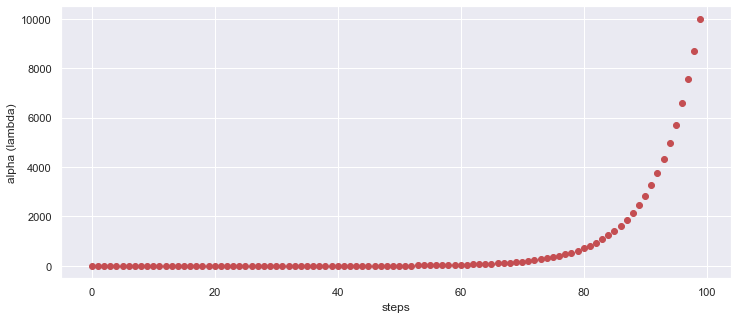

In [37]:
alpha_ridge = 10 ** np.linspace(-2, 4, 100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge, "or")
plt.xlabel("steps")
plt.ylabel("alpha (lambda)")
plt.show()

In [38]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge :
    ridge.set_params(alpha=i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

np.shape(coefs_ridge)

(100, 5)

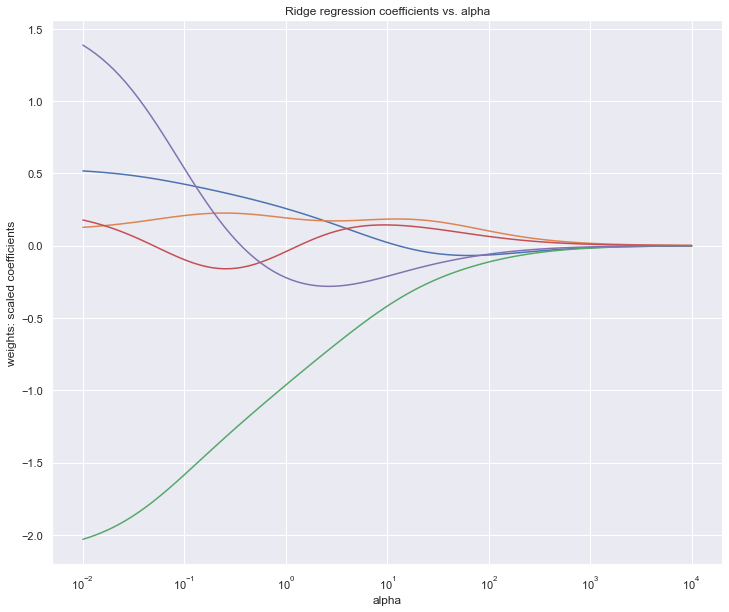

In [42]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Ridge regression coefficients vs. alpha")
plt.legend(df.drop("y", axis=1, inplace=False).columns)
plt.show()

### lasso regression coefficients vs alpha

In [44]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [46]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso :
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

np.shape(coefs_lasso)

(100, 5)

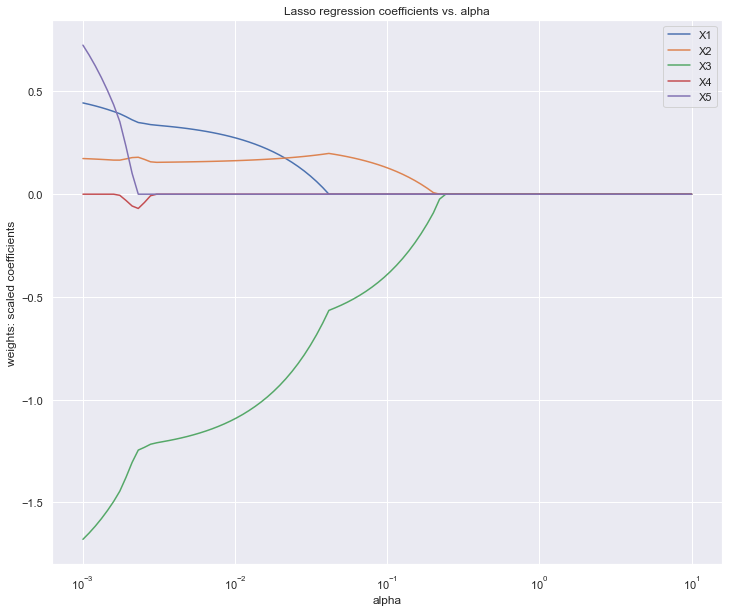

In [47]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Lasso regression coefficients vs. alpha")
plt.legend(df.drop("y", axis=1, inplace=False).columns)
plt.show()

### Elastic Net regression coefficients vs alpha

In [48]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [49]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet :
    elasticnet.set_params(alpha=i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)

np.shape(coefs_elasticnet)

(100, 5)

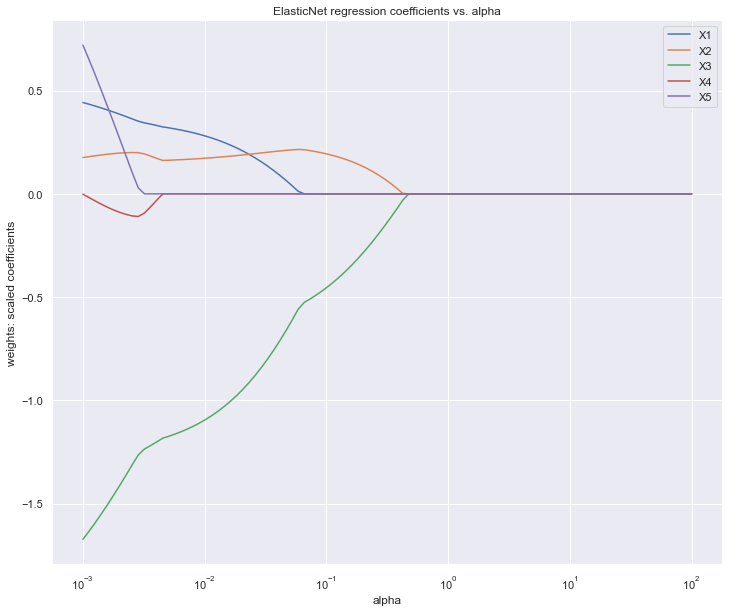

In [50]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("ElasticNet regression coefficients vs. alpha")
plt.legend(df.drop("y", axis=1, inplace=False).columns)
plt.show()

## Cross Validation

The main usage of CV is to tune the hyperparameters

Let's use the cross validation to find the optimal lambdas (alphas) for different models

### Optimal alpha for Ridge regression

In [56]:
ridgecv = RidgeCV() # Ridge regression with built-in cross-validation.
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.0

In [57]:
alpha_ridge_opt = ridgecv.alpha_

### Optimal alpha for Lasso regression

In [58]:
lassocv = LassoCV() # Lasso linear model with iterative fitting along a regularization path.
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.004564470133023309

In [59]:
alpha_lasso_opt = lassocv.alpha_

### Optimal alpha for Elastic Net regression

In [60]:
elasticnetcv = ElasticNetCV() # Elastic Net model with iterative fitting along a regularization path.
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.006440286888331817

In [61]:
elasticnetcv.l1_ratio_

0.5

In [62]:
alpha_elasticnet_opt = elasticnetcv.alpha_

## Refit the models

### Training the model with optimum alphas

In [64]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [65]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [66]:
df_predictions = pd.DataFrame({"y_test" : y_test,
                              "y_hat_linear" : y_hat_linear,
                              "y_hat_ridge" : y_hat_ridge,
                              "y_hat_lasso" : y_hat_lasso,
                              "y_hat_net" : y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.175576,0.154862,0.163279
4,-0.404102,-0.079686,-0.032038,-0.047122,-0.044388
62,-1.055680,-0.180921,-0.148966,-0.148200,-0.149537
63,2.538916,2.344482,2.083804,2.156366,2.139361
48,1.144605,-0.078630,-0.001604,-0.031199,-0.022572


### coefficients

In [67]:
df.drop("y", axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [68]:
coefficients = pd.DataFrame({"Features": df.drop("y", axis=1, inplace=False).columns})
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.256687,0.322054,0.308461
1,X2,0.103655,0.192091,0.156880,0.165614
2,X3,-2.133872,-0.963844,-1.183806,-1.151128
3,X4,0.253492,-0.041360,-0.000000,-0.000000
4,X5,1.593336,-0.221195,0.000000,-0.000000


### performence in test set

In [69]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [70]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.894

In [71]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.81

In [72]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.781

# Regularization wtih Boston Data set (real world example)

In this notebook we  will explore the three methods and compare their result with a multiple linear regression model applied to Boston Housing dataset. The terget variable is **price** and the features are 10 polynomial features os LSTAT; % lower status of the population. LSTAT2 = LSTAT**2, LSTAT3 = LSTAT**3,.. and etc.

In [76]:
df = pd.read_csv("Regularization_Boston.csv")
df.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,24.0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04,3.782986e+05,1.883927e+06,9.381957e+06
1,21.6,9.14,83.5396,763.551944,6978.864768,63786.823980,583011.571200,5.328726e+06,4.870455e+07,4.451596e+08,4.068759e+09
2,34.7,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04,6.957294e+04,2.803790e+05,1.129927e+06
3,33.4,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03,5.581856e+03,1.641066e+04,4.824733e+04
4,36.2,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845900,1.222054e+05,6.513549e+05,3.471722e+06,1.850428e+07


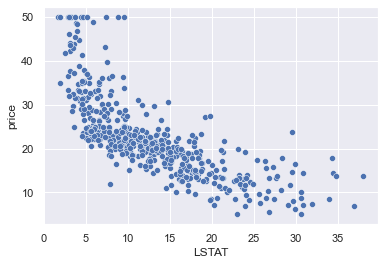

In [78]:
sns.scatterplot(x="LSTAT", y="price", data = df);

**important:** we need to normalize the features before training the models.

In [79]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc

array([[ 0.15968566, -1.0755623 , -0.78952949, ..., -0.20115811,
        -0.1777807 , -0.15953586],
       [-0.10152429, -0.49243937, -0.54045362, ..., -0.20100802,
        -0.17774223, -0.15952611],
       [ 1.32424667, -1.2087274 , -0.82582493, ..., -0.20115907,
        -0.17778084, -0.15953588],
       ...,
       [ 0.14880191, -0.98304761, -0.7598079 , ..., -0.20115611,
        -0.17778036, -0.1595358 ],
       [-0.0579893 , -0.86530163, -0.71663755, ..., -0.20114963,
        -0.17777912, -0.15953557],
       [-1.15724782, -0.66905833, -0.63138918, ..., -0.20111311,
        -0.1777707 , -0.15953367]])

In [80]:
df.describe()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,22.532806,12.653063,210.993989,4285.788793,1.001336e+05,2.587609e+06,7.198029e+07,2.114923e+09,6.477077e+10,2.048399e+12,6.645292e+13
std,9.197104,7.141062,236.061920,7329.288372,2.342059e+05,7.737927e+06,2.628503e+08,9.126326e+09,3.223061e+11,1.153345e+13,4.169512e+14
min,5.000000,1.730000,2.992900,5.177717,8.957450e+00,1.549639e+01,2.680875e+01,4.637914e+01,8.023592e+01,1.388081e+02,2.401381e+02
25%,17.025000,6.950000,48.303700,335.727443,2.333481e+03,1.621932e+04,1.127384e+05,7.836504e+05,5.447333e+06,3.786664e+07,2.632333e+08
50%,21.200000,11.360000,129.050000,1466.017088,1.665411e+04,1.891930e+05,2.149266e+06,2.441612e+07,2.773731e+08,3.151037e+09,3.579677e+10
75%,25.000000,16.955000,287.472100,4874.091998,8.264029e+04,1.401168e+06,2.375683e+07,4.027977e+08,6.829447e+09,1.157935e+11,1.963285e+12
max,50.000000,37.970000,1441.720900,54742.142570,2.078559e+06,7.892289e+07,2.996702e+09,1.137850e+11,4.320410e+12,1.640460e+14,6.228820e+15


In [81]:
# checking the first observation for LSTAT
(24-22.532806)/9.197104

0.15952782528065348

In [82]:
df.columns

Index(['price', 'LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6',
       'LSTAT7', 'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [85]:
df_sc = pd.DataFrame(df_sc, columns = df.columns)
df_sc.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,0.159686,-1.075562,-0.789529,-0.568459,-0.425339,-0.334341,-0.274058,-0.231960,-0.201158,-0.177781,-0.159536
1,-0.101524,-0.492439,-0.540454,-0.481046,-0.398141,-0.326485,-0.271896,-0.231384,-0.201008,-0.177742,-0.159526
2,1.324247,-1.208727,-0.825825,-0.576388,-0.426841,-0.334599,-0.274100,-0.231966,-0.201159,-0.177781,-0.159536
3,1.182758,-1.361517,-0.858040,-0.581856,-0.427649,-0.334708,-0.274114,-0.231968,-0.201159,-0.177781,-0.159536
4,1.487503,-1.026501,-0.774228,-0.564647,-0.424519,-0.334180,-0.274029,-0.231955,-0.201157,-0.177781,-0.159536


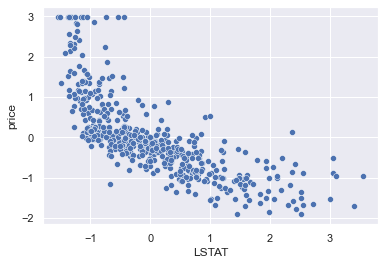

In [86]:
sns.scatterplot(x="LSTAT", y="price", data = df_sc);

## Splitting the data

In [87]:
y = df_sc["price"]
X = df_sc.drop("price", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
300,-0.922773,-0.738456,-0.554782,-0.422166,-0.333671,-0.273926,-0.231935,-0.201154,-0.177780,-0.159536
32,2.110588,2.361250,2.320551,2.091900,1.778692,1.449896,1.143940,0.878417,0.658205,0.481244
181,-0.448985,-0.516017,-0.470071,-0.393883,-0.324988,-0.271404,-0.231230,-0.200962,-0.177729,-0.159522
272,-0.690084,-0.641318,-0.522245,-0.412708,-0.331167,-0.273304,-0.231787,-0.201120,-0.177772,-0.159534
477,1.718101,1.736491,1.525676,1.217641,0.905982,0.635721,0.420786,0.259256,0.142724,0.061306


As we can see from the table above, the variables are highly correlated with each other. Let's first run a linear regression and see the results as benchmark.

In [88]:
X_test_wc = sm.add_constant(X_test)  # wc(with constant)
X_train_wc = sm.add_constant(X_train)  # wc(with constant)

In [89]:
sm.OLS(y_train, X_train_wc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     82.44
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           4.51e-90
Time:                        15:17:55   Log-Likelihood:                -344.23
No. Observations:                 404   AIC:                             710.5
Df Residuals:                     393   BIC:                             754.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.029      0.417      0.677      -0.044       0.068
LSTAT         10.4856     14.789      0.709      0.479     -18.591      39.562
LSTAT2      -198.4474    183.865     -1.079      0.281    -559.929     163.035
LSTAT3      1218.5360   1157.209      1.053      0.293   -1056.559    3493.631
LSTAT4     -4039.5201   4549.147     -0.888      0.375    -1.3e+04    4904.187
LSTAT5      8029.8874   1.19e+04      0.675      0.500   -1.54e+04    3.14e+04
LSTAT6     -9630.6577   2.11e+04     -0.456      0.649   -5.11e+04    3.19e+04
LSTAT7      6399.3110   2.51e+04      0.255      0.799    -4.3e+04    5.58e+04
LSTAT8     -1554.6344   1.92e+04     -0.081      0.935   -3.93e+04    3.62e+04
LSTAT9      -523.9209   8485.139     -0.062      0.951   -1.72e+04    1.62e+04
LSTAT10      288.1740   1645.665      0.175      0.861   -2947.235    3523.583
==============================================================================
Omnibus:                      106.759   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.634
Skew:                           1.217   Prob(JB):                     3.91e-70
Kurtosis:                       6.614   Cond. No.                     4.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Training the models

In this section we will train 4 different models :

1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [90]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [92]:
# first fit models using default alphas.

model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [93]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [94]:
df_predictions = pd.DataFrame({"y_test" : y_test,
                              "y_hat_linear" : y_hat_linear,
                              "y_hat_ridge" : y_hat_ridge,
                              "y_hat_lasso" : y_hat_lasso,
                              "y_hat_net" : y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,-0.079757,-0.019459,0.029108,0.009199,0.059533
426,-1.342272,-0.480570,-0.589703,0.009199,-0.054729
22,-0.798084,-0.736176,-0.786380,0.009199,-0.120425
268,2.282016,2.053967,1.495823,0.009199,0.216942
371,2.989460,0.041490,0.171371,0.009199,0.078830


## coefficients

In [96]:
df.drop("price", axis=1, inplace=False).columns

Index(['LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6', 'LSTAT7',
       'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [97]:
coefficients = pd.DataFrame({"Features": df.drop("price", axis=1, inplace=False).columns})
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,LSTAT,10.485596,-1.997427,-0.0,-0.154677
1,LSTAT2,-198.447363,1.120503,-0.0,-0.000000
2,LSTAT3,1218.536029,0.705506,-0.0,-0.000000
3,LSTAT4,-4039.520114,-0.029523,-0.0,-0.000000
4,LSTAT5,8029.887432,-0.331986,-0.0,-0.000000
5,LSTAT6,-9630.657688,-0.305169,-0.0,-0.000000
6,LSTAT7,6399.310943,-0.150135,-0.0,-0.000000
7,LSTAT8,-1554.634406,0.007747,-0.0,-0.000000
8,LSTAT9,-523.920944,0.115016,-0.0,-0.000000
9,LSTAT10,288.174049,0.159595,-0.0,-0.000000


## performence in the test set

In [98]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.541

In [99]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.559

In [100]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

# alpha = 1 old. için burada bias yüksek. bu nedenle RMSE değeri de yüksek.

1.006

In [101]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.898

## plotting the regression coefficients vs alphas

### ridge regression coefficients vs alpha

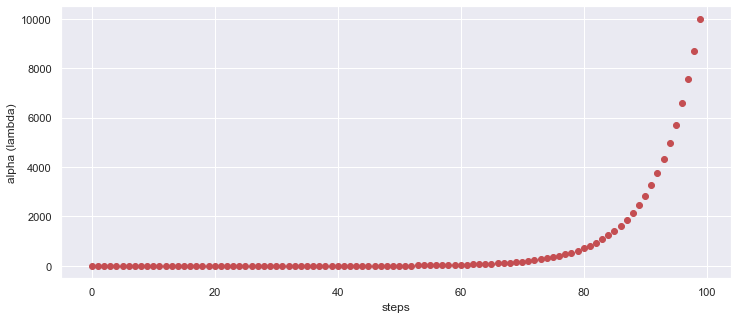

In [102]:
alpha_ridge = 10 ** np.linspace(-2, 4, 100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge, "or")
plt.xlabel("steps")
plt.ylabel("alpha (lambda)")
plt.show()

In [103]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge :
    ridge.set_params(alpha=i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

np.shape(coefs_ridge)

(100, 10)

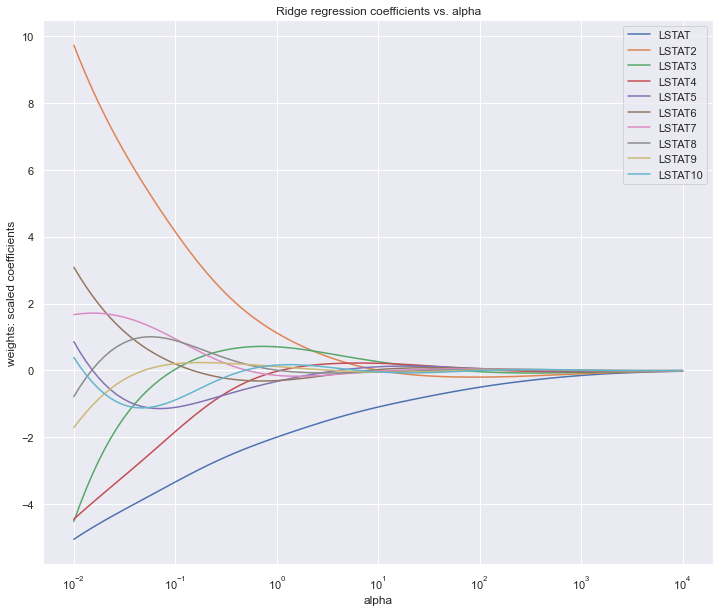

In [104]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Ridge regression coefficients vs. alpha")
plt.legend(df.drop("price", axis=1, inplace=False).columns)
plt.show()

### lasso regression coefficients vs alpha

In [105]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [106]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso :
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

np.shape(coefs_lasso)

(100, 10)

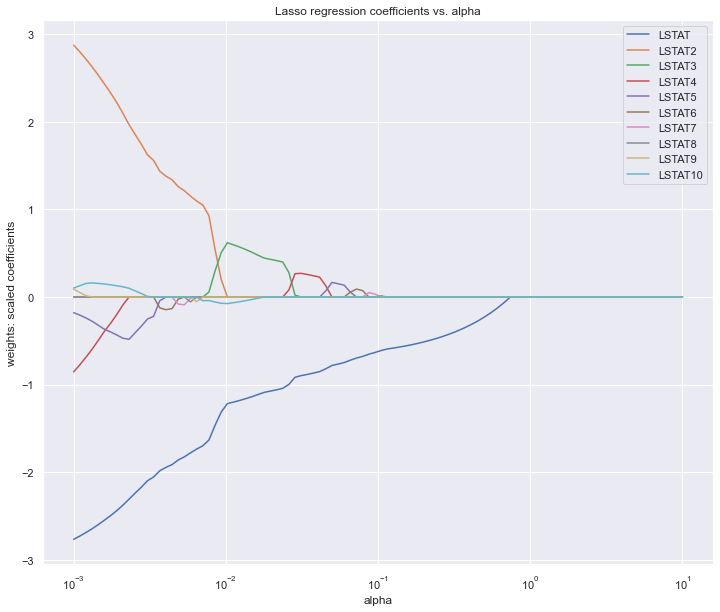

In [107]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Lasso regression coefficients vs. alpha")
plt.legend(df.drop("price", axis=1, inplace=False).columns)
plt.show()

### Elastic Net regression coefficients vs alpha

In [108]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [109]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet :
    elasticnet.set_params(alpha=i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)

np.shape(coefs_elasticnet)

(100, 10)

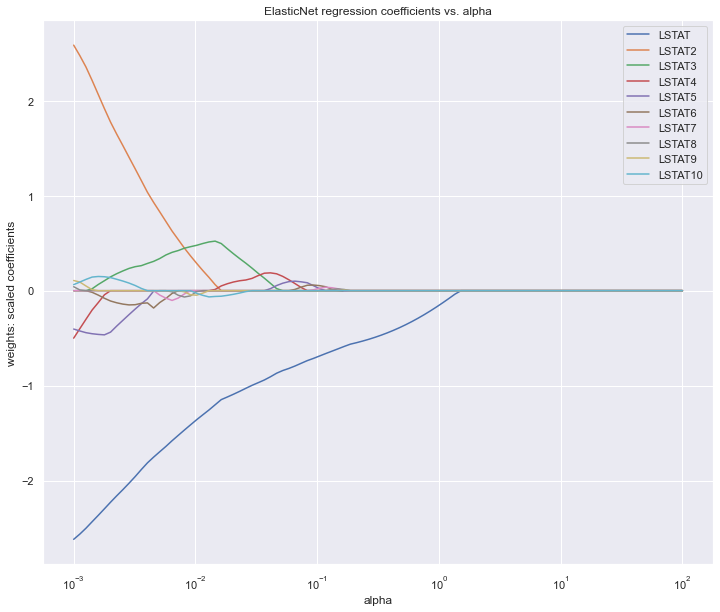

In [110]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("ElasticNet regression coefficients vs. alpha")
plt.legend(df.drop("price", axis=1, inplace=False).columns)
plt.show()

## Cross Validation

The main usage of CV is to tune the hyperparameters

Let's use the cross validation to find the optimal lambdas (alphas) for different models

### Optimal alpha for Ridge regression

In [111]:
ridgecv = RidgeCV() # Ridge regression with built-in cross-validation.
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [112]:
alpha_ridge_opt = ridgecv.alpha_

### Optimal alpha for Lasso regression

In [113]:
lassocv = LassoCV() # Lasso linear model with iterative fitting along a regularization path.
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0007404280761639708

In [114]:
alpha_lasso_opt = lassocv.alpha_

### Optimal alpha for Elastic Net regression

In [115]:
elasticnetcv = ElasticNetCV() # Elastic Net model with iterative fitting along a regularization path.
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.0014808561523279417

In [116]:
elasticnetcv.l1_ratio_

0.5

In [117]:
alpha_elasticnet_opt = elasticnetcv.alpha_

## Refit the models

### Training the model with optimum alphas

In [118]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [119]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [120]:
df_predictions = pd.DataFrame({"y_test" : y_test,
                              "y_hat_linear" : y_hat_linear,
                              "y_hat_ridge" : y_hat_ridge,
                              "y_hat_lasso" : y_hat_lasso,
                              "y_hat_net" : y_hat_net})

df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,-0.079757,-0.019459,-0.060977,-0.035060,0.002918
426,-1.342272,-0.480570,-0.554453,-0.586640,-0.589195
22,-0.798084,-0.736176,-0.700808,-0.741599,-0.771307
268,2.282016,2.053967,1.704469,1.644818,1.561793
371,2.989460,0.041490,0.074970,0.106679,0.144806


### coefficients

In [121]:
df.drop("price", axis=1, inplace=False).columns

Index(['LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6', 'LSTAT7',
       'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [122]:
coefficients = pd.DataFrame({"Features": df.drop("price", axis=1, inplace=False).columns})
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,LSTAT,10.485596,-3.338292,-2.881643,-2.407915
1,LSTAT2,-198.447363,4.145483,3.177391,2.157390
2,LSTAT3,1218.536029,0.033768,-0.171943,0.037987
3,LSTAT4,-4039.520114,-1.831517,-0.952324,-0.174159
4,LSTAT5,8029.887432,-1.106420,-0.148212,-0.456016
5,LSTAT6,-9630.657688,0.194270,0.000000,-0.027716
6,LSTAT7,6399.310943,0.943296,0.000000,-0.000000
7,LSTAT8,-1554.634406,0.893451,0.129962,0.000000
8,LSTAT9,-523.920944,0.199729,0.085688,0.000000
9,LSTAT10,288.174049,-0.885226,0.028347,0.151022


### performence in test set

In [123]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.541

In [124]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.555

In [125]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.558

In [126]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.557